In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, random, shutil, time
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sys

#mac
util_path = "/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/util"

#constance
'''args = sys.argv[0:]
py_file = args[0]
py_file_wo_path = os.path.basename(py_file)

code_location = os.path.dirname(os.path.abspath(py_file))
index_of_latest = code_location.index('latest')
util_path = os.path.join(code_location[:index_of_latest], "latest", "util")
'''

sys.path.insert(0, util_path)

In [9]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/2_bmd/2_bmd/latest/phase_III/LPR/0_conc/20_sec_time_interval


In [10]:
# mac       - phase III - LPR - 240 timepoints - devel
#complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_III/input/behavior/LPR/wide/devel/Tanguay_Phase_3_zf_LPR_data_PNNL_2021MAR23_full_w_240_timepoints_wide_devel.csv'

# mac       - phase III - LPR - 240 timepoints - full
complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_III/input/behavior/LPR/wide/full/Tanguay_Phase_3_zf_LPR_data_PNNL_2021MAR23_full_w_240_timepoints_wide_full.csv'


df_lpr = pd.read_csv(complete_file_path, header = 0)
display(df_lpr.head())
display(df_lpr.tail())

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,234,14389,A01,234_14389_A01,67.0,5.480,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,2.281,0.000,0.123,0.000
1,234,14389,A02,234_14389_A02,67.0,32.079,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.618,1.341,1.430,0.000,0.000,0.000
2,234,14389,A03,234_14389_A03,67.0,13.307,0.0,0.0,0.0,0.0,...,13.011,11.341,4.929,7.515,4.945,10.594,5.991,5.906,9.567,15.081
3,234,14389,A04,234_14389_A04,67.0,5.473,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,1.580,21.592,16.256,0.000,0.000
4,234,14389,A05,234_14389_A05,67.0,23.419,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,3.056,1.710,0.000,0.000,0.000


,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
44757,4457,22097,H07,4457_22097_H07,0.410,3.039,2.687,1.377,0.000,0.000,...,11.801,18.257,17.200,10.414,14.054000,19.325000,11.771,15.775,15.214000,12.643
44758,4457,22097,H08,4457_22097_H08,0.140,0.788,0.000,0.235,1.363,0.000,...,0.000,0.000,13.915,23.894,24.219001,22.199001,17.062,24.027,25.584001,20.297
44759,4457,22097,H09,4457_22097_H09,0.046,7.927,6.095,5.866,8.247,2.588,...,15.934,15.963,18.418,3.608,4.169000,14.569000,15.436,12.355,17.204000,14.720
44760,4457,22097,H10,4457_22097_H10,0.015,6.812,8.603,12.531,3.115,0.000,...,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000,0.000,0.000000,0.000
44761,4457,22097,H12,4457_22097_H12,0.000,2.133,3.411,3.063,1.915,0.000,...,15.954,10.916,6.787,8.197,12.142000,14.601000,0.258,20.165,12.394000,0.000


In [11]:
# preprocess chemical ids
df_lpr['chemical.id'] = (df_lpr['chemical.id'].values).astype(int)
df_lpr['chemical.id'] = (df_lpr['chemical.id'].values).astype(str)

display(len(np.unique(df_lpr['chemical.id'])))
#display(np.unique(df_lpr['chemical.id']))
#display(df_lpr.head())
#display(df_lpr.tail())

215

In [12]:
# preprocess plate ids
df_lpr['plate.id'] = (df_lpr['plate.id'].values).astype(int)
df_lpr['plate.id'] = (df_lpr['plate.id'].values).astype(str)

display(len(np.unique(df_lpr['plate.id'])))
#display(np.unique(df_lpr['plate.id']))
display(df_lpr.head())

501

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,234,14389,A01,234_14389_A01,67.0,5.480,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,2.281,0.000,0.123,0.000
1,234,14389,A02,234_14389_A02,67.0,32.079,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.618,1.341,1.430,0.000,0.000,0.000
2,234,14389,A03,234_14389_A03,67.0,13.307,0.0,0.0,0.0,0.0,...,13.011,11.341,4.929,7.515,4.945,10.594,5.991,5.906,9.567,15.081
3,234,14389,A04,234_14389_A04,67.0,5.473,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,1.580,21.592,16.256,0.000,0.000
4,234,14389,A05,234_14389_A05,67.0,23.419,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,3.056,1.710,0.000,0.000,0.000


## Load morphological data for filtering wells that have dead fish

In [13]:
#mac       - phase III - morpho - full
morph_data_file_complete_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_III/input/morpho/full/wide/Tanguay_Phase_3_zf_morphology_data_PNNL_2021MAR23_full_w_all_endpoints.csv'

df_morph = pd.read_csv(morph_data_file_complete_path, header = 0)
display(df_morph.head())
display(len(df_morph))

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRN_,CRAN,DNC_,DP24,EDEM,LTRK,MO24,MORT,MUSC,NC__,SKIN,SM24,TCHR
0,725,21511,A01,725_21511_A01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,725,21511,A02,725_21511_A02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,725,21511,A03,725_21511_A03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,725,21511,A04,725_21511_A04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,725,21511,A05,725_21511_A05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


61419

In [14]:
# Goal of this box 
# -> (in df_lpr) leave only rows with non 1 and NA MORT

# Running time
# -> 8 seconds for 1 chemical

# 1. Append additional identifier column (Plate_Well value) to lpr and morphology data
# 2. Find rows in morphology data for which MORT end-point is not 1 or NA
# 3. Using Plate_Well values, find corresponding rows in lpr data to filter the data

# (ref)
# '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/after_merging/tall/bifurcated/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_merged_full_240_timepoints_cpw_added.csv'
# cpw added here already to save 23 minutes

start_time = time.time()

df_lpr['Chemical_Plate_WELL'] = df_lpr[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
# used to take few minutes, but in 5/9/2021, it takes 23 minutes

display(df_lpr.head())


df_morph['Chemical_Plate_WELL'] = df_morph[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
#display(df_morph.head())
#print("df_morph.shape:" + str(df_morph.shape)) # (69395, 29)

df_morpho_nonna_plate_well = df_morph.Chemical_Plate_WELL[~((df_morph.MORT == 1) | (df_morph.MORT.isnull()))]
#display(df_morpho_nonna_plate_well.head())
#print("df_morpho_nonna_plate_well.shape:" + str(df_morpho_nonna_plate_well.shape)) # (57558,)

df_lpr_filtered = df_lpr.loc[df_lpr['Chemical_Plate_WELL'].isin(list(df_morpho_nonna_plate_well.values))]

#display(df_morpho_nonna_plate_well[0:5])
#display(df_lpr.Chemical_Plate_WELL[0:5])

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took)) 
# 13 seconds took for 215 chemicals

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
0,234,14389,A01,234_14389_A01,67.0,5.480,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,2.281,0.000,0.123,0.000,234_14389_A01
1,234,14389,A02,234_14389_A02,67.0,32.079,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.618,1.341,1.430,0.000,0.000,0.000,234_14389_A02
2,234,14389,A03,234_14389_A03,67.0,13.307,0.0,0.0,0.0,0.0,...,11.341,4.929,7.515,4.945,10.594,5.991,5.906,9.567,15.081,234_14389_A03
3,234,14389,A04,234_14389_A04,67.0,5.473,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,1.580,21.592,16.256,0.000,0.000,234_14389_A04
4,234,14389,A05,234_14389_A05,67.0,23.419,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,3.056,1.710,0.000,0.000,0.000,234_14389_A05


Done, it took:13.1 seconds


In [15]:
print("\ndf_lpr.shape:" + str(df_lpr.shape))

print("df_lpr_filtered.shape:"+str(df_lpr_filtered.shape) + "\n") 
display('df_lpr_filtered.head()',df_lpr_filtered.head())


df_lpr.shape:(44762, 246)
df_lpr_filtered.shape:(39256, 246)



'df_lpr_filtered.head()'

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
0,234,14389,A01,234_14389_A01,67.0,5.480,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,2.281,0.000,0.123,0.000,234_14389_A01
1,234,14389,A02,234_14389_A02,67.0,32.079,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.618,1.341,1.430,0.000,0.000,0.000,234_14389_A02
2,234,14389,A03,234_14389_A03,67.0,13.307,0.0,0.0,0.0,0.0,...,11.341,4.929,7.515,4.945,10.594,5.991,5.906,9.567,15.081,234_14389_A03
3,234,14389,A04,234_14389_A04,67.0,5.473,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,1.580,21.592,16.256,0.000,0.000,234_14389_A04
4,234,14389,A05,234_14389_A05,67.0,23.419,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,3.056,1.710,0.000,0.000,0.000,234_14389_A05


In [22]:
# [Goal] 
# Convert time resolution to minutes (if applicable)
# Create a new dataframe for storing lpr data in the new time-scale (minutes)
# The new dataframe contains the same basic row identifier fields

# Running time
# took 6 seconds for 215 chemicals

start_time = time.time()

#df_lpr_min = df_lpr_filtered_no_na[['chemical.id', 'conc', 'plate.id', 'well']]
df_lpr_min = df_lpr_filtered[['chemical.id', 'conc', 'plate.id', 'well']]

print ("(before transforming for " + str(interval) + "), df_lpr_min.shape:" + str(df_lpr_min.shape))
# for chemical.id = 53 -> (184, 4)
#display(df_lpr_min.head())
#display(df_lpr_min.tail())

time_index_sec_start   = 5
ori_max_time_index_sec = 240 # from t0 to t239

#report = True
report = False

#interval = "1 min"
#interval = "30 sec"
interval = "12 sec"
print ("interval:" + str(interval))
if (interval == "1 min"):
    group_size = 10 # (10 X 6 sec/interval = 1 min/interval)
elif (interval == "30 sec"):
    group_size = 5 # (5 X 6 sec/interval = 30 sec/interval)
else: # interval = "12 sec"
    group_size = 2 # (2 X 6 sec/interval = 12 sec/interval)

num_time_points = 0
for time_index in range(int(ori_max_time_index_sec / group_size)):
    num_time_points += 1
    start_index = time_index_sec_start + group_size * time_index
    end_index = start_index + group_size
    if (report):
        print ("\ntime_index:" + str(time_index))
        print ("start_index:"  + str(start_index))
        print ("end_index:"    + str(end_index))
        
    df_lpr_min_in_this_time_index = pd.DataFrame(np.sum(df_lpr_filtered.iloc[:,start_index:end_index], axis = 1))
    #if (report):
        # print ("df_lpr_min_in_this_time_index.shape:\n" + str(df_lpr_min_in_this_time_index.shape))
        # display(df_lpr_min_in_this_time_index.head())
        # display(df_lpr_min_in_this_time_index.tail())
        # display(df_lpr_min_in_this_time_index)
    
    df_lpr_min_in_this_time_index.columns = ['t' + str(time_index)]
    #lpr_filtered_data_in_minutes_in_this_time_index.columns = np.transpose(['t' + str(i) for i in range(int(ori_max_time_index_sec / group_size))])
    df_lpr_min = pd.concat([df_lpr_min, df_lpr_min_in_this_time_index], axis = 1)
    
    #display(df_lpr_min.head())
    #display(df_lpr_min.tail())
    
pd.set_option('display.max_columns', None)

print ("(after  transforming for " + str(interval) + "), df_lpr_min.shape:" + str(df_lpr_min.shape))
# for chemical.id = 53 -> (184, 28)
#display(df_lpr_min.head())

#print ("\nlen(np.unique(df_lpr_min['chemical.id'])):")
#display(len(np.unique(df_lpr_min['chemical.id'])))
#print ("\nnp.unique(df_lpr_min['chemical.id']):")
#display(np.unique(df_lpr_min['chemical.id']))


#lpr_filtered_data_in_minute.head(100) # this should have only 0~23 Tns

df_lpr_min['chemical_conc'] = df_lpr_min[['chemical.id','conc']].apply(lambda x: '_'.join(x.map(str)), axis = 1)

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Conversion of time interval is done. It took "+str(time_took))


(before transforming for 12 sec), df_lpr_min.shape:(39256, 4)
interval:12 sec
(after  transforming for 12 sec), df_lpr_min.shape:(39256, 124)
Conversion of time interval is done. It took 9.8 seconds


In [18]:
display(df_lpr_min.head())
display(df_lpr_min.tail())

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,t51,t52,t53,t54,t55,t56,t57,t58,t59,t60,t61,t62,t63,t64,t65,t66,t67,t68,t69,t70,t71,t72,t73,t74,t75,t76,t77,t78,t79,t80,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90,t91,t92,t93,t94,t95,t96,t97,t98,t99,t100,t101,t102,t103,t104,t105,t106,t107,t108,t109,t110,t111,t112,t113,t114,t115,t116,t117,t118,t119,chemical_conc
0,234,67.0,14389,A01,5.480,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,4.158,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0.0,0.000,0.000,0.000,0.00,0.000,0.0,0.000,0.0,0.000,0.000,0.000,12.220,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,9.919,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,16.411,39.745999,2.875,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.986,0.000,2.021,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,25.657,4.826,10.977,35.040001,8.625,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.281,0.123,234_67.0
1,234,67.0,14389,A02,32.079,0.0,0.0,0.0,1.673,0.522,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.316,0.000,1.371,0.000000,0.000,0.000,0.000,0.000,0.609000,0.000,0.000,0.0,0.000,0.000,1.160,0.00,0.000,0.0,0.000,0.0,0.000,0.000,0.757,0.000,2.864,4.732,0.461,1.819,0.000,0.000,0.00,0.000,2.816,0.000,1.924,1.613,0.275,0.00,1.195,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.020,0.000,0.210000,0.342,3.180,0.000,0.000,3.050,0.000,0.601,0.088,0.000,0.993,1.603,1.537,2.397,6.356,0.0,0.0,0.0,0.0,0.000,0.000,0.742,0.0,0.0,7.493,0.0,0.0,1.037,0.0,0.000,0.000,0.000,0.000000,0.000,3.927,0.000,2.811,0.000,0.000,0.000,0.000,1.959,1.430,0.000,234_67.0
2,234,67.0,14389,A03,13.307,0.0,0.0,0.0,5.888,2.965,3.171,0.233,42.355,43.183,40.224,2.638,0.0,0.0,0.0,0.000,8.556,13.294,10.203,12.403,11.432,16.882,23.423,12.866,12.688,13.115000,18.110,12.363,16.614,16.012,30.009001,23.049,9.225,0.0,1.146,0.446,0.000,0.00,0.389,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.158,5.686,4.067,2.22,10.425,8.158,12.802,18.538,16.735,14.537,16.18,27.930,13.258,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.041,10.996,5.543000,0.000,7.554,13.569,10.639,14.805,13.700,12.319,12.275,17.275,19.328,17.843,9.086,10.823,1.071,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,5.545,12.979,0.000,0.000000,8.350,9.839,9.611,10.323,15.753,22.482,24.352,12.444,15.539,11.897,24.648,234_67.0
3,234,67.0,14389,A04,5.473,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,75.779001,6.996,0.000,0.000,0.000,21.046000,0.000,0.000,0.0,0.000,9.528,19.716,0.00,0.000,0.0,0.000,0.0,1.454,1.156,16.258,0.591,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.673,0.000,0.000,0.000,0.000,0.00,14.361,0.000,0.000,0.000,3.427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,0.000,0.759,0.000,0.000,0.000,0.000,0.000,0.000,0.000,12.964,0.0,0.0,0.0,0.0,7.294,27.409,0.433,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.580,37.848,0.000,234_67.0
4,234,67.0,14389,A05,23.419,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,1.091,0.000,2.280,0.000,0.000,1.437000,2.055,0.000,0.000,3.017,6.376000,4.613,0.000,0.0,0.000,0.000,0.000,0.84,1.650,0.0,1.234,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.048,0.00,1.742,2.182,1.406,0.000,0.000,0.000,0.00,0.587,0.000,0.148,0.498,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.186,0.000000,0.000,0.000,0.000,1.461,0.000,38.335,33.803,3.571,0.000,0.000,0.000,0.000,0.000,0.199,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,t51,t52,t53,t54,t55,t56,t57,t58,t59,t60,t61,t62,t63,t64,t65,t66,t67,t68,t69,t70,t71,t72,t73,t74,t75,t76,t77,t78,t79,t80,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90,t91,t92,t93,t94,t95,t96,t97,t98,t99,t100,t101,t102,t103,t104,t105,t106,t107,t108,t109,t110,t111,t112,t113,t114,t115,t116,t117,t118,t119,chemical_conc
44757,4457,0.410,22097,H07,5.726,1.377,0.000,9.747,3.431,0.000,0.096,0.000,0.000,0.000,0.135,0.000,1.344,6.635,0.232,0.114,0.000000,8.711,6.535000,13.919,25.513,22.738,12.395,12.157,20.806000,21.786,14.819,34.148,19.970000,19.648000,2.905,0.000,0.451,0.05,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,17.512,33.421,0.000,24.732000,25.624000,27.921,20.055999,18.116,25.622,32.917,24.140,22.515000,31.892001,25.220,23.838001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,11.825000,0.000,22.189,18.828,13.915000,14.525,19.327000,23.367,24.373,8.692,17.907999,28.775999,26.545,24.722000,28.671999,9.891,0.000,0.0,0.000,0.000,0.189,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.280,13.695000,30.960,14.488000,3.885000,20.844,26.877001,17.743,39.411999,21.151000,16.947,30.058,27.613999,33.379000,27.546,27.857000,4457_0.41
44758,4457,0.140,22097,H08,0.788,1.598,0.000,4.389,0.664,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.599,0.131,3.594000,3.644,2.082000,1.265,1.031,0.857,1.260,1.062,0.173000,0.982,0.780,0.101,0.282000,1.207000,14.810,0.000,0.000,0.00,0.0,2.470,8.897,0.286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000,0.000000,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000,0.399000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.869,0.0,0.0,0.000,0.0,18.291000,16.816,0.000,0.000,2.076000,1.401,0.000000,0.000,4.101,1.035,59.255998,0.000000,0.326,22.415001,59.206001,6.530,0.000,0.0,0.000,0.000,0.212,0.226,0.557,0.0,0.0,0.029,0.159,0.000,0.0,0.000,0.000000,0.276,0.000000,0.130000,0.000,0.096000,0.000,1.561000,0.000000,0.000,0.000,37.809000,46.418001,41.089,45.881001,4457_0.14
44759,4457,0.046,22097,H09,14.022,14.113,3.662,19.763,5.701,5.971,2.761,4.182,2.190,3.388,3.729,0.000,5.600,0.000,5.013,61.775,49.729001,33.759,41.927001,36.654,39.268,48.193,43.113,32.675,43.284001,28.546,16.820,22.412,40.129999,36.391999,21.044,0.461,0.000,0.00,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.907,21.788,27.625,37.358,35.409999,26.669999,33.006,35.681999,4.794,24.372,30.539,23.014,21.550001,26.848999,29.083,5.737000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.196,0.1,0.0,0.362,0.0,31.826000,34.962,11.537,27.482,21.832001,26.864,32.930001,24.520,19.675,9.459,21.605000,24.908000,13.057,21.773000,23.764000,7.773,0.000,0.0,0.000,0.654,0.000,0.142,0.000,0.0,0.0,0.000,0.811,1.838,0.0,0.701,42.649999,0.000,0.000000,15.889000,30.649,35.725000,15.164,40.297999,36.354001,26.692,31.897,22.026000,18.738000,27.791,31.924000,4457_0.046
44760,4457,0.015,22097,H10,15.415,15.646,1.596,17.362,3.737,0.699,1.218,0.645,1.028,0.216,0.554,0.366,0.000,0.377,0.000,0.000,0.000000,0.000,0.000000,0.499,0.000,0.000,0.000,0.000,0.000000,0.111,0.000,0.000,0.000000,0.000000,0.000,0.000,0.000,0.00,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000,0.000000,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.000000,0.000,0.000,0.000,0.000000,0.000,0.000000,0.000,0.000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000,0.0,0.256,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.000,2.629000,0.000,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000,0.000000,4457_0.015
44761,4457,0.000,22097,H12,5.544,4.978,0.588,14.046,1.768,1.995,0.364,0.238,0.685,0.000,0.000,0.000,0.000,0.153,0.000,14.550,13.335000,3.055,2.324000,0.972,3.368,12.974,7.425,24.94

6263

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,t51,t52,t53,t54,t55,t56,t57,t58,t59,t60,t61,t62,t63,t64,t65,t66,t67,t68,t69,t70,t71,t72,t73,t74,t75,t76,t77,t78,t79,t80,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90,t91,t92,t93,t94,t95,t96,t97,t98,t99,t100,t101,t102,t103,t104,t105,t106,t107,t108,t109,t110,t111,t112,t113,t114,t115,t116,t117,t118,t119,chemical_conc
84,234,0.0,14389,H01,17.223000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,3.295,0.000,1.879,0.000,0.000000,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.000000,0.000000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.757,0.0,0.000,0.000000,0.000,0.000,0.000,0.00,0.000000,0.748,0.00,0.000,0.861,0.0,0.06,0.511,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000000,0.000,0.0,0.000,0.000,0.000000,0.000,2.083000,0.483,0.000000,0.000,0.000,0.999,1.180,234_0.0
85,234,0.0,14389,H02,12.876000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000,4.321,0.601,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.000000,0.000000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000000,0.000,0.000,0.000,0.00,0.000000,0.000,0.00,0.000,0.000,0.0,0.00,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,42.366998,0.000,0.0,0.000,0.000,0.000000,0.000,0.000000,0.000,0.000000,0.000,0.000,0.000,0.000,234_0.0
86,234,0.0,14389,H03,41.785000,15.826,0.292,0.000,0.000,0.000,0.000,0.000,0.822,0.0,0.000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000000,0.000000,18.125000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.000000,0.000000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.000,2.855000,13.455,30.416,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.781,0.000,0.0,0.000,37.555000,12.632,0.000,0.000,0.00,0.000000,0.000,0.00,0.000,0.000,0.0,0.00,0.000,1.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,5.790,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,30.781,25.756000,0.000,0.0,0.000,0.000,0.000000,0.000,2.644000,0.000,0.000000,0.000,0.000,0.000,0.000,234_0.0
87,234,0.0,14389,H04,31.939999,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,1.045,0.000,0.000000,0.000,0.000,0.0,0.000,3.993,4.88,1.815,0.0,0.0,0.0,5.770,33.627,51.688001,38.333000,0.738000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.000000,0.000000,2.701,0.000,0.000,87.203001,0.890,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,3.634,0.000,0.000,0.000,0.000,0.062,0.836,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000000,0.000,0.000,0.000,0.00,0.000000,0.000,0.00,0.000,4.632,0.0,0.00,0.000,0.0,0.0,0.000,1.122,0.0,0.000,1.568,0.000,0.000,0.782,0.000,0.0,0.0,0.000,0.000,0.000,0.842,6.349,50.648999,33.733,0.0,0.000,23.094,27.183999,30.133,33.375999,31.499,33.084000,28.928,3.409,8.452,23.587,234_0.0
88,234,0.0,14389,H05,36.917999,0.000,0.000,0.000,0.235,2.601,0.000,0.000,0.000,0.0,2.289,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0,0.0,0.0,2.308,0.000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000,1.093,7.312000,0.000000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.0000

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/2_bmd/2_bmd/latest/phase_III/LPR/0_conc/20_sec_time_interval
Tanguay_Phase_3_zf_LPR_data_PNNL_2021MAR23_full_w_240_timepoints_wide_full_0_conc.png


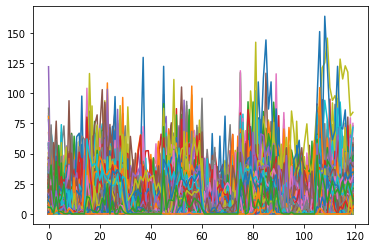

In [24]:
# Plot few lpr curves to check transition points
# 0 concentration

time_index_start = 4 # because 0-3th columns show irrelevant values (e.g. chemical.id, conc, plate.id, well)

df_0_conc       = df_lpr_min.loc[df_lpr_min['conc'] == 0]

#print ("df_0_conc.shape:" + str(df_0_conc.shape))
# chemical.id 414 -> (181, 29)
# all 197 chemicals that have 240 variables -> (15718, 29)

#print (lpr_min.iloc[:1, time_index_start:time_index_start + num_time_points]) 
# first ':' shows rows, second ':' shows columns

fig, ax = plt.subplots()

#ax.plot(np.transpose(df_0_conc.iloc[10:44,time_index_start:time_index_start + num_time_points].values));
ax.plot(np.transpose(df_0_conc.iloc[:,time_index_start:time_index_start + num_time_points].values));
display(len(df_0_conc))
display(df_0_conc.head(10))

#ax.plot(np.transpose(df_partial_0_conc.iloc[:,time_index_start:time_index_start + num_time_points].values));
#display(len(df_partial_0_conc))
#display(df_partial_0_conc.head(10))

complete_file_path_basename = os.path.basename(complete_file_path)
output_filename_wo_ext = os.path.splitext(complete_file_path_basename)[0]
output_filename = output_filename_wo_ext + "_0_conc.png"
cwd = os.getcwd()
print (cwd)
print (output_filename)
#plt.savefig(output_filename, bbox_inches="tight")

In [26]:
#'''## identify biggest change of peaks in each ccp (chemical_conc_plate)

#trans_points = [3,9,15,21]
#trans_points = [2,8,14,20]   # 1 min interval

#trans_points = [6,18,30,42]
#trans_points = [5,17,29,41]  # 30 sec interval

#trans_points = [15,45,75,105]
trans_points = [14,44,74,104] # 12 sec interval


df_lpr_min_ccp = df_0_conc.copy()
#df_lpr_min_ccp = df_partial_0_conc.copy()
df_lpr_min_ccp.insert(0, 'chemical_conc_plate', df_0_conc.loc[:,['chemical.id','conc','plate.id']].apply(lambda x: '_'.join(x.map(str)), axis = 1))

#f_out = open("report.txt","w+")
arr_max_index_per_trans_14 = []
arr_max_index_per_trans_44 = []
arr_max_index_per_trans_74 = []
arr_max_index_per_trans_104 = []

for ccp in np.unique(df_lpr_min_ccp.chemical_conc_plate):
    #print (str(ccp))
    df_per_ccp = df_lpr_min_ccp.loc[df_lpr_min_ccp.chemical_conc_plate == ccp,:]
    #display(df_per_ccp.head())
    
    for trans_index, trans_point in enumerate(trans_points):
        former_timepoints_mean = 999
        arr_diff = []
        #print ("\ntrans_point:" + str(trans_point))
        for i in range (-2, 4):
            current_timepoint = 't' + str(trans_point+i)
            #print ("current_timepoint:" + str(current_timepoint))
            values = df_per_ccp[current_timepoint]
            #print ("values:" + str(values))
            diff = values.mean() - former_timepoints_mean
            arr_diff.append(diff)
            former_timepoints_mean = values.mean()
        #print ("arr_diff:"+str(arr_diff))
        max_diff = max(arr_diff)
        index_of_max_diff = arr_diff.index(max_diff)
        
        unique_ccp = np.unique(df_per_ccp['chemical_conc_plate'])
        save_this = unique_ccp[0]
        save_this = save_this + " trans_point: " + str(trans_point) + ", index_of_max_diff: " + str(index_of_max_diff) + "\n"
        #print (save_this)
        
        #print (index_of_max_arr_diff)
        #f_out.write(save_this)
        if (trans_point == 14):
            arr_max_index_per_trans_14.append(index_of_max_diff)
        elif (trans_point == 44):
             arr_max_index_per_trans_44.append(index_of_max_diff)
        elif (trans_point == 74):
            arr_max_index_per_trans_74.append(index_of_max_diff)
        else: # (trans_point == 104):
            arr_max_index_per_trans_104.append(index_of_max_diff)
        
#f_out.close()
print ("Biggest change of peaks in each ccp is identified")

Biggest change of peaks in each ccp is identified


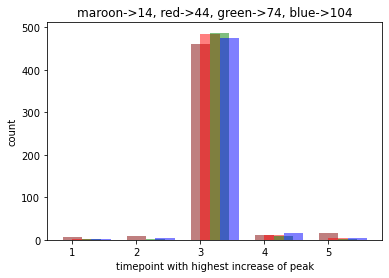


transition points at 2->3 min
mean: 3.04 , std: 0.45

transition points at 8->9 min
mean: 3.04 , std: 0.25

transition points at 14->15 min
mean: 3.01 , std: 0.21

transition points at 20->21 min
mean: 3.03 , std: 0.31


In [28]:
# draw
unique_counts = np.unique(arr_max_index_per_trans_14)
x_14_unique = []
y_14 = []
for i in range(len(unique_counts)):
    x_14_unique.append(unique_counts[i])
    count = arr_max_index_per_trans_14.count(unique_counts[i])
    y_14.append(count)

unique_counts = np.unique(arr_max_index_per_trans_44)
x_44_unique = []
y_44 = []
for i in range(len(unique_counts)):
    x_44_unique.append(unique_counts[i])
    count = arr_max_index_per_trans_44.count(unique_counts[i])
    y_44.append(count)

unique_counts = np.unique(arr_max_index_per_trans_74)
x_74_unique = []
y_74 = []
for i in range(len(unique_counts)):
    x_74_unique.append(unique_counts[i])
    count = arr_max_index_per_trans_74.count(unique_counts[i])
    y_74.append(count)

unique_counts = np.unique(arr_max_index_per_trans_104)
x_104_unique = []
y_104 = []
for i in range(len(unique_counts)):
    x_104_unique.append(unique_counts[i])
    count = arr_max_index_per_trans_104.count(unique_counts[i])
    y_104.append(count)
    
alpha=0.5
plt.bar(np.array(x_14_unique),       y_14,  color ='maroon',width = 0.3, alpha=alpha)
plt.bar(np.array(x_44_unique) +0.15, y_44,  color ='red',   width = 0.3, alpha=alpha)
plt.bar(np.array(x_74_unique)+0.3,  y_74, color ='green', width = 0.3, alpha=alpha)
plt.bar(np.array(x_104_unique)+0.45, y_104, color ='blue',  width = 0.3, alpha=alpha)
    
plt.xlabel("timepoint with highest increase of peak")
plt.ylabel("count")
plt.title("maroon->14, red->44, green->74, blue->104")
plt.show()

print ("\ntransition points at 2->3 min")
print ("mean:", round(np.mean(arr_max_index_per_trans_14),2), ", std:", round(np.std(arr_max_index_per_trans_14),2))

print ("\ntransition points at 8->9 min")
#print ("arr_max_index_per_trans_8:" + str(arr_max_index_per_trans_8))
print ("mean:", round(np.mean(arr_max_index_per_trans_44),2), ", std:", round(np.std(arr_max_index_per_trans_44),2))

print ("\ntransition points at 14->15 min")
print ("mean:", round(np.mean(arr_max_index_per_trans_74),2), ", std:", round(np.std(arr_max_index_per_trans_74),2))

print ("\ntransition points at 20->21 min")
print ("mean:", round(np.mean(arr_max_index_per_trans_104),2), ", std:", round(np.std(arr_max_index_per_trans_104),2))

In [33]:
df_lpr_min.get_value(10, 't1')

AttributeError: 'DataFrame' object has no attribute 'get_value'

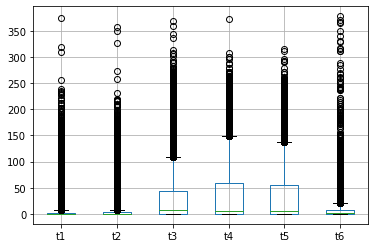

In [28]:
fig, ax = plt.subplots()
boxplot = df_lpr_min.boxplot(column=['t1', 't2', 't3', 't4', 't5', 't6'])

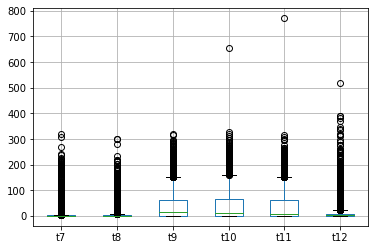

In [29]:
fig, ax = plt.subplots()
boxplot = df_lpr_min.boxplot(column=['t7', 't8', 't9', 't10', 't11', 't12'])

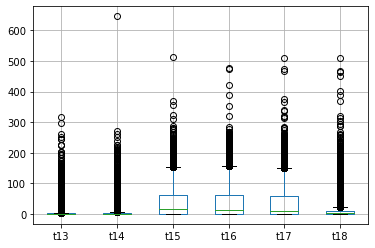

In [30]:
fig, ax = plt.subplots()
boxplot = df_lpr_min.boxplot(column=['t13', 't14', 't15', 't16', 't17', 't18'])

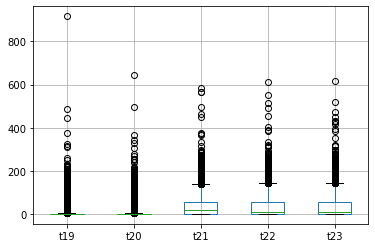

In [32]:
fig, ax = plt.subplots()
boxplot = df_lpr_min.boxplot(column=['t19', 't20', 't21', 't22', 't23'])

In [ ]:
display(len(df_lpr_min_ccp))
display(df_lpr_min_ccp)

In [ ]:
####### stop here
a=b

In [ ]:
## calculate MOV, AUC for 0 chemical concentration only

df_delta_0_conc = df_lpr_min_0_conc[['chemical.id', 'conc', 'plate.id', 'well']].copy()
#'delta' was 'delta_mov_auc'

trans_points = [2,8,14,20] # "official"
#trans_points = [2,8,15,21]
end_points = ['MOV', 'AUC']

num_light = 3 # seems reasonable since interval between middle points of each peak ~= 6
num_dark  = 3

for trans_index, trans_point in enumerate(trans_points):
    for just_index, end_point in enumerate(end_points):
        if (end_point == 'MOV'):
            delta_0_conc['MOV' + str(trans_index + 1)] \
            = lpr_min['t' + str(trans_point + 1)] \
            - lpr_min['t' + str(trans_point)]
        else:
            delta_0_conc['AUC' + str(trans_index + 1)] \
            = sum(lpr_min['t' + str(trans_point + 1 + index_count)] \
                  for index_count in range(num_dark)) \
            - sum(lpr_min['t' + str(trans_point - index_count)] \
                  for index_count in range(num_light))
        
display(delta_0_conc.head(1))
delta_0_conc.to_csv("delta_mov_auc_0_conc.csv", index=False)

In [ ]:
######## investigate whether AUC4 is negative

AUC1_mean_neg = AUC1_mean_pos = AUC2_mean_neg = AUC2_mean_pos = 0
AUC3_mean_neg = AUC3_mean_pos = AUC4_mean_neg = AUC4_mean_pos = 0

unique_chemical_id_s = np.unique(delta_0_conc['chemical.id'])
print (len(unique_chemical_id_s))
for i in range(len(unique_chemical_id_s)):
    chemical_id = unique_chemical_id_s[i]
    #if (chemical_id != 414):
    #    continue
    #print ("\n", chemical_id)
    per_chemical = delta_0_conc.loc[delta_0_conc['chemical.id'] == chemical_id]
    #display(per_chemical)
    #display(per_chemical["AUC4"].mean())

    AUC1_mean = float(per_chemical["AUC1"].mean())
    if (AUC1_mean) < 0:
        AUC1_mean_neg += 1
    else:
        AUC1_mean_pos += 1
            
    AUC2_mean = float(per_chemical["AUC2"].mean())
    if (AUC2_mean) < 0:
        AUC2_mean_neg += 1
    else:
        AUC2_mean_pos += 1
        
    AUC3_mean = float(per_chemical["AUC3"].mean())
    if (AUC3_mean) < 0:
        AUC3_mean_neg += 1
    else:
        AUC3_mean_pos += 1

    AUC4_mean = float(per_chemical["AUC4"].mean())
    if (AUC4_mean) < 0:
        AUC4_mean_neg += 1
    else:
        AUC4_mean_pos += 1

display(AUC1_mean_pos) # 100
display(AUC1_mean_neg) # 1

display(AUC2_mean_pos) # 100
display(AUC2_mean_neg) # 1

display(AUC3_mean_pos) # 100
display(AUC3_mean_neg) # 1

display(AUC4_mean_pos) # 62
display(AUC4_mean_neg) # 39
#display(AUC4_df.head())

In [ ]:
display("before dropna, len(df_lpr_filtered):"+str(len(df_lpr_filtered)))
df_lpr_filtered_no_na = df_lpr_filtered.dropna(how='any')
display("after dropna,  len(df_lpr_filtered_no_na):"+str(len(df_lpr_filtered_no_na)))

is_NaN = df_lpr_filtered.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_lpr_filtered[row_has_NaN]

display(rows_with_NaN.head())
display(len(rows_with_NaN))

In [ ]:
#df_lpr.to_csv("df_lpr_cpw_added.csv",index=False)
df_lpr_filtered.to_csv("df_lpr_filtered_cpw_added.csv",index=False)

In [ ]:
display(df_lpr_filtered_no_na.head())

print ("df_lpr_filtered_no_na.shape:" + str(df_lpr_filtered_no_na.shape))
#(8160610, 7)

#display(len(lpr_filtered_data))
#lpr_filtered_data.to_csv("lpr_filtered_data.csv",index=False)

In [ ]:
# skip this
"(Lisa) LPR (5d): L1: T61-89; D1: T90-119; L2: T120-149; D2: T150-179; L3: T180-209; D3: T210-239"

# (L0,D0) 
# T1 - T60 --> 360 seconds -> 6 minutes

# (L1,D1) 
# T61 - T120 --> 360 seconds -> 6 minutes

# (L2,D2) 
# T121 - T180 --> 360 seconds -> 6 minutes

# (L3,D3) 
# T181 - T240 --> 360 seconds -> 6 minutes

In [ ]:
# calculate new decreasing endpoints
delta_mov_auc_w_decreasing = delta_mov_auc.copy()
for transition_index, transition_point in enumerate(transition_points):
    print ("\ntransition_index:" + str(transition_index))
    print ("transition_point:" + str(transition_point))
    
    for just_index, end_point in enumerate(end_points):
        ori = str(end_point) + str(transition_index + 1)
        #print ("\nori:" + str(ori))
        #print ("delta_mov_auc_w_decreasing[ori]:\n" + str(delta_mov_auc_w_decreasing[ori]))
        
        for new_index in range(len(transition_points)-1):
            final_index = transition_index + new_index
            new = str(end_point) + str(final_index+2)
            #print ("new:" + str(new))
            check_whether_new_exists = new in delta_mov_auc_w_decreasing.columns
            #print ("check_whether_new_exists:"+str(check_whether_new_exists))
            if (check_whether_new_exists == False):
                continue
            name = str(end_point) + str(transition_index + 1) + "_" + str(new)
            print ("name:" + str(name))
            delta_mov_auc_w_decreasing[name] \
                = delta_mov_auc_w_decreasing[ori] - delta_mov_auc_w_decreasing[new]
display (delta_mov_auc_w_decreasing.head(1))

In [ ]:
# calculate final decreasing endpoints
delta_mov_auc_w_decreasing_copied = delta_mov_auc_w_decreasing.copy()
delta_mov_auc_final = delta_mov_auc_w_decreasing.copy()
columns_to_keep = []
for just_index, end_point in enumerate(end_points):
    for (columnName, columnData) in delta_mov_auc_w_decreasing_copied.iteritems():
        if "_" not in columnName:
            continue
        if str(end_point) not in columnName:
            continue
#        print('Colunm Name : ', columnName)
        columns_to_keep.append(columnName)

    delta_mov_auc_w_decreasing_copied_select = delta_mov_auc_w_decreasing_copied.loc[:,columns_to_keep]
    
    # "axis 0” represents rows
    # "axis 1” represents columns

    all_ = delta_mov_auc_w_decreasing_copied_select.sum(axis=1)
   # print ("all_:\n" + str(all_))
    
    final_endpoint_name = str(end_point) + "_all_" 
    delta_mov_auc_final.insert(0, final_endpoint_name, all_)
    

display("delta_mov_auc_final.head():", delta_mov_auc_final.head())
    
delta_mov_auc_final.to_csv("delta_mov_auc_final.csv",index=False)
    

In [ ]:
# Rename column headers to make it compatible with earlier data received from Lisa
delta_mov_auc.rename(columns={"chemical.id": "Chemical.ID", "conc": "CONC", "plate.id": "Plate", "well": "WELL"}, inplace = True)
display(delta_mov_auc.head())
#display(delta_mov_auc.tail())

In [ ]:
import generate_dose_response as gdr
import BMD_BMDL_estimation as bmdest
import Plot_Save as ps

In [ ]:
start_time = time.time()
os.chdir(starting_dir)

if (os.path.isdir("output") == True):
    shutil.rmtree("output")
os.mkdir("output")

output_folder = os.path.join(starting_dir, "output")
os.chdir(output_folder)

full_devel = "full"
#full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(delta_mov_auc['Chemical.ID'])
    end_points_from_here = ['MOV1','AUC1']
else:
    chemical_id_from_here = [53]
    end_points_from_here = ['MOV1']

#report = True
report = False

for chemical_id in chemical_id_from_here:
    if (report): print("chemical_id:" + str(chemical_id))
    for end_point in end_points_from_here:
        if (report): print("end_point:" + str(end_point))
        # subset original dataframe for a user-specified chemical and end_point pair
        delta_mov_auc_end_point_chemical_id = delta_mov_auc.loc[delta_mov_auc['Chemical.ID'] == chemical_id,['Chemical.ID', 'CONC', 'Plate', 'WELL', end_point]]
        #print("delta_mov_auc_end_point_chemical_id:\n"+str(delta_mov_auc_end_point_chemical_id))
        #print("type(delta_mov_auc_end_point_chemical_id):\n"+str(type(delta_mov_auc_end_point_chemical_id)))
        #print("type(end_point):\n"+str(type(end_point)))

        dose_response = gdr.gen_dose_response_behavior(delta_mov_auc_end_point_chemical_id, end_point)
        if (report): print("dose_response:\n"+str(dose_response))
        qc_flag = gdr.BMD_feasibility_analysis(dose_response)
        test_dose_response = gdr.reformat_dose_response(dose_response)
        #test_dose_response = dose_response
        if(qc_flag in [0, 1]):
            # No BMD analysis required. Generate report and exit
            ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, None)
        else:
            # Fit dose response models
            model_predictions = bmdest.analyze_dose_response_data(test_dose_response)
            # Select best model
            selected_model_params = bmdest.select_model(model_predictions)
            # Check if unique model is found
            unique_model_flag = selected_model_params['no_unique_model_found_flag']
            if(unique_model_flag == 0):
                # Generate report
                ps.save_results_good_data_unique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
            else:
                bmd_analysis_flag = selected_model_params['model_select_flag']
                if(bmd_analysis_flag == 1):
                    ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, selected_model_params)
                else:
                    ps.save_results_good_data_nounique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took))
# 1 chemical (3756) and 2 endpoints (['MOV1','AUC1']), 140 seconds took
# 7 chemicals and 2 endpoints (['MOV1','AUC1']), 6 minutes took

time_filename = 'running_time.txt'
f_time = open(time_filename, 'w')
f_time.write(str(time_took))
f_time.close()